# Assignment 5
### Do all four questions.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pickle

**1.** Let's review some basic matrix multiplication. When you have an $M \times N$ matrix $A$ with $M$ rows and $N$ columns, 
$$
A= \left[ \begin{array}{cccc} a_{11} & a_{12} & ... & a_{1N} \\
a_{21} & a_{22} & ... & a_{2N} \\
\vdots & \vdots & ... & \vdots \\
a_{M1} & a_{M2} & ... & a_{MN} 
\end{array} \right],
$$
and you right-multiply it by a vector
$$
x = \left[ \begin{array}{c} x_1 \\ x_2 \\ \vdots \\ x_N 
\end{array} \right],
$$
you get
$$
Ax = \left[ \begin{array}{c} \sum_{i=1}^N a_{1i} x_i \\ \sum_{i=1}^N a_{2i} x_i \\ \vdots \\ \sum_{i=1}^N a_{Mi} x_i 
\end{array} \right].
$$
This is just "matrix row times column vector" element-by-element, stacking the results into a new vector.

For this to make sense, $N$ must be the same for the matrix and the vector, but $M$ can be different from $N$. 

Let's play with some NumPy to see this. First we'll define a matrix $A$:

In [2]:
A = np.array([ [1,2,3],
              [4,5,6],
              [7,8,9]])
A

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

a. Multiply $A$ times each of the following vectors using the @ operator. Explain which part of the $A$ matrix gets selected and explain why, using the definition of matrix multiplication. 

In [3]:
e_1 = np.array([1,0,0])
e_2 = np.array([0,1,0])
e_3 = np.array([0,0,1])

In [4]:
A @ e_1

array([1, 4, 7])

1. For A @ e_1, the first column gets selected because when you perform matrix multiplication, you multiply the rows of the first matrix by the columns of the second matrix. Since, the second matrix only has a 1 in the first row (and zeros everywhere else), the product of the matrix is a 3x1 matrix that is the first matrix's first column.

In [5]:
A @ e_2

array([2, 5, 8])

2. For A @ e_2, the second column gets selected because when you perform matrix multiplication, you multiply the rows of the first matrix by the columns of the second matrix. Since, the second matrix only has a 1 in the second row (and zeros everywhere else), the product of the matrix is a 3x1 matrix that is the first matrix's second column.

In [6]:
A @ e_3

array([3, 6, 9])

3. For A @ e_3, the third column gets selected because when you perform matrix multiplication, you multiply the rows of the first matrix by the columns of the second matrix. Since, the second matrix only has a 1 in the last row, the product of the matrix is a 3x1 matrix that is the first matrix's last column.

b. Now multiply $A$ times $u = (1,1,1)$. Explain the logic of the result with the definition of matrix multiplication.

In [7]:
u = np.ones(3)
A @ u

array([ 6., 15., 24.])

Since the second matrix has all ones, when you multiple A's rows by u's column, the product is the sum of each row. This is because you add all of the individual components together into a singular value for each row when they are multiplied by 1. Since the multiplier is 1, it is simple addition.

c. Whenever a matrix has 1's on the diagonal and zeros everywhere else, we call it an **identity matrix**. What happens when you multiple $A$ times $x$ below? What happens when you multiple an identity matrix times any vector? Explain your result with the definition of matrix multiplication.

In [8]:
A = np.array([ [1,0,0],
              [0,1,0],
              [0,0,1]])
x = np.array([-2,4,11])

A @ x


array([-2,  4, 11])

The definition of an identity matrix is a matrix that when multiple by another vector, the product is the same vector. Therefore in this case, when A (an identity matrix) is multiple by x, the product is a matrix that is identical to x.

d. What if every row and column sum to 1, but the 1's are no longer on the diagonal? Multiple $A$ times $X$ below and explain the result. Create another matrix whose rows and columns sum to 1, but is not an identity matrix, and show how it permutes the values of $x$. 

In [9]:
A = np.array([ [0,0,1],
              [1,0,0],
              [0,1,0]])
x = np.array([-2,4,11])

A @ x


array([11, -2,  4])

If the 1's are still there but aren't on the diagonol, the result is a matrix with the same values but rearranged in a different order. The order depends on where the 1's are placed. 

In [10]:
B = np.array([[0,1,0],
              [0,0,1],
              [1,0,0]])

B @ x

array([ 4, 11, -2])

Again, the result is the product contains the same values as the original matrix but in a different order.

e. The next matrix $A$ could be a Markov transition matrix: Its columns sum to 1, and each entry $a_{ij}$ can be interpreted as the proportion of observations who moved from state $j$ to state $i$. Multiply $A$ by each of the vectors $e_1$, $e_2$, and $e_3$, and explain your results.

In [11]:
rng = np.random.default_rng(100)
A = rng.random((3,3)) # Generate a random 3X3 matrix
sums = np.sum(A,axis=0) # Column sums
A = A/sums # Normalize the columns so they sum to 1
print(A)

[[0.50052958 0.24049286 0.18358131]
 [0.02574731 0.39251588 0.37907577]
 [0.47372311 0.36699127 0.43734292]]


In [12]:
A @ e_1

array([0.50052958, 0.02574731, 0.47372311])

f. For each of the vectors $e_1, e_2, e_3$, multiple $A$ times that vector 5 times. What answer do you get for each starting vector? Describe the behavior you observe.

In [ ]:
print("For e_1:")
v = e_1.copy()
for _ in range(5):
    v = A @ v
    print(v)

print("For e_2:")
v = e_2.copy()
for _ in range(5):
    v = A @ v
    print(v)

print("For e_3:")
v = e_3.copy()
for _ in range(5):
    v = A @ v
    print(v)

For e_1:
[0.50052958 0.02574731 0.47372311]
[0.34368862 0.20257047 0.45374091]
[0.30404142 0.26036337 0.43559521]
[0.29476439 0.27514859 0.43008701]
[0.29266551 0.27862515 0.42870935]
For e_2:
[0.24049286 0.39251588 0.36699127]
[0.28214379 0.29937825 0.41847795]
[0.29004438 0.28341002 0.42654561]
[0.29163968 0.2804039  0.42795643]
[0.29197422 0.27979983 0.42822595]
For e_3:
[0.18358131 0.37907577 0.43734292]
[0.26334088 0.31930609 0.41735304]
[0.28521895 0.29032145 0.4244596 ]
[0.29050361 0.28220175 0.42729464]
[0.29171646 0.2802254  0.42805814]


Each vector, even though the starting vectors are different, converge to the same vector after about 5 iterations.

*2.* Let's consider a simple Markov transition matrix over two states:
$$
T = \left[ \begin{array}{cc} p_{1\leftarrow 1} &  p_{1\leftarrow 2} \\
p_{2 \leftarrow 1} & p_{2 \leftarrow 2} \end{array}\right] 
$$
The arrows help visualize the transition a bit: This is the same index notation as usual, $p_{ij}$, but writing it $p_{i \leftarrow j}$ emphasizes that it's the proportion of times that state $j$ transitions to state $i$. Below, $T$ is given by
$$
T = \left[ \begin{array}{cc} .25 & .5 \\
.75 & .5 \end{array}\right].
$$

- Start in state 1, at the initial condition $[1,0]$. Multiply that vector by $T$. Write out the result in terms of the formula and compute the result in a code chunk below. What is this object you're looking at, in terms of proportions and transitions?
- Multiple by $T$ again. What do you get? This isn't a column of $T$. Explain in words what it is. (Hint: A forecast of what in what period?)
- Keep multiplying the current vector of outcomes by $T$. When does it start to settle down without changing further?
- Do the above analysis again, starting from the initial condition $[0,1]$. Do you get a different result?
- The take-away is that, in the long run, these chains settle down into the long-run proportions, and the sensitivity on initial conditions vanishes. 


In [53]:
T = np.array([[ 1/4, 1/2],
                 [ 3/4, 1/2 ]])

In [54]:
init_condition = np.array([1,0])
print(init_condition)

[1 0]


In [55]:
p_1 = T @ init_condition
print(p_1)

[0.25 0.75]


This is the probabilities that after one iteration

In [57]:
p_2 = T @ p_1
print(p_2)

[0.4375 0.5625]


This is a forecast of the probabilities after the second iteration (two days out)

In [58]:
p_3 = T @ p_2
print(p_3)

[0.390625 0.609375]


In [59]:
n = 100
p = np.array([1,0])
for t in range(n):
    print(p)
    p = T @ p

[1 0]
[0.25 0.75]
[0.4375 0.5625]
[0.390625 0.609375]
[0.40234375 0.59765625]
[0.39941406 0.60058594]
[0.40014648 0.59985352]
[0.39996338 0.60003662]
[0.40000916 0.59999084]
[0.39999771 0.60000229]
[0.40000057 0.59999943]
[0.39999986 0.60000014]
[0.40000004 0.59999996]
[0.39999999 0.60000001]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0

At iteration 15, the steady state is reached and no more changes happen. Even at about iteration 5, the probabilities are very similar and don't change much.

In [64]:
n = 1000
state = 0
sim = []
for t in range(n):
    sim.append(state)
    prob = T[:, state]
    state = np.random.choice(a = [0,1], p = prob)
print(sim)

[0, np.int64(1), np.int64(1), np.int64(0), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(0), np.int64(1), np.int64(0), np.int64(1), np.int64(1), np.int64(0), np.int64(1), np.int64(1), np.int64(0), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(0), np.int64(1), np.int64(1), np.int64(0), np.int64(1), np.int64(0), np.int64(1), np.int64(1), np.int64(1), np.int64(0), np.int64(1), np.int64(1), np.int64(0), np.int64(1), np.int64(1), np.int64(0), np.int64(1), np.int64(0), np.int64(1), np.int64(0), np.int64(1), np.int64(1), np.int64(0), np.int64(1), np.int64(1), np.int64(0), np.int64(1), np.int64(0), np.int64(0), np.int64(1), np.int64(0), np.int64(1), np.int64(1), np.int64(0), np.int64(1), np.int64(1), np.int64(0), np.int64(1), np.int64(0), np.int64(0), np.int64(1), np.int64(0), np.int64(1), np.int64(1), np.int64(0), np.int64(0), np.int64(1), np.int64(0), np.int64(0), np.int64(1), np.int64(0), np.int64(1), np.int64(1), np.int64(1), np.int64(0), np.int64(0), np.int64

In [65]:
x = np.array(sim)
np.mean(x)

np.float64(0.581)

No, the result is basically the same since iterations over time and space are usually identical.

3. Weather data

- Load the `cville_weather.csv` data. This includes data from Jan 4, 2024 to Feb 2, 2025. Are there any missing data issues?
- Based on the precipitation variable, `PRCP`, make a new variable called `rain` that takes the value 1 if `PRCP`>0 and 0 otherwise.
- Build a two-state Markov chain over the states 0 and 1 for the `rain` variable. 
- For your chain from c, how likely is it to rain if it was rainy yesterday? How likely is it to rain if it was clear yesterday?
- Starting from a clear day, forecast the distribution. How quickly does it converge to a fixed result? What if you start from a rainy day?
- Conditional on being rainy, plot a KDE of the `PRCP` variable.
- Describe one way of making your model better for forecasting and simulation the weather.

Congratulations, you now are a non-parametric meteorologist!

1. Yes, there are many features with missing data.
2. New rain column

In [39]:
import pandas as pd

data = pd.read_csv("cville_weather.csv")

In [40]:
# 2. New rain column
data["rain"] = data["PRCP"] > 0

# 3. Two-state Markov chain

seq = data["rain"].to_numpy()

states = list(np.unique(seq))
print('States:\n', states)

S = len(states)
T = len(seq)
tr_counts = np.zeros((S, S))

for t in range(1, T):  
    x_tm1 = seq[t-1]   
    x_t = seq[t]       
    index_from = states.index(x_tm1)
    index_to = states.index(x_t)
    tr_counts[index_to, index_from] += 1

print(f'\nTransition Counts:\n {tr_counts}')

sums = tr_counts.sum(axis=0, keepdims=True)

tr_pr = np.divide(tr_counts, 
                  sums, 
                  out=np.zeros_like(tr_counts), 
                  where=sums!=0)

tr_pr_1 = tr_pr 

pd.DataFrame(np.round(tr_pr, 2), index=states, columns=states)


States:
 [np.False_, np.True_]

Transition Counts:
 [[169.  63.]
 [ 62. 116.]]


,False,True
False,0.73,0.35
True,0.27,0.65


4. Rainy -> Rainy is a 0.65 probability while Clear -> Clear is a 0.73 probability

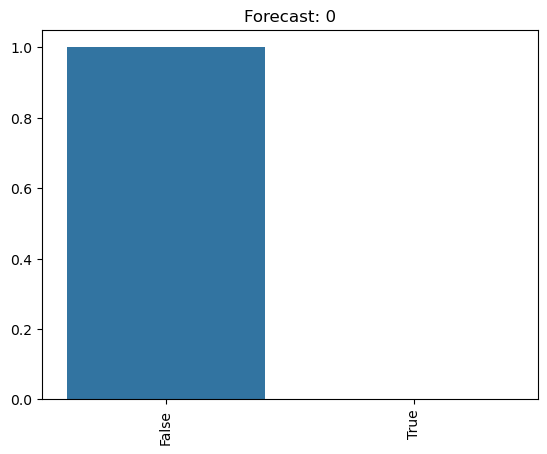

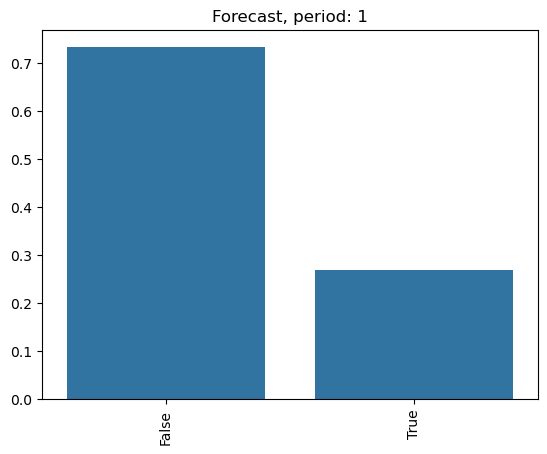

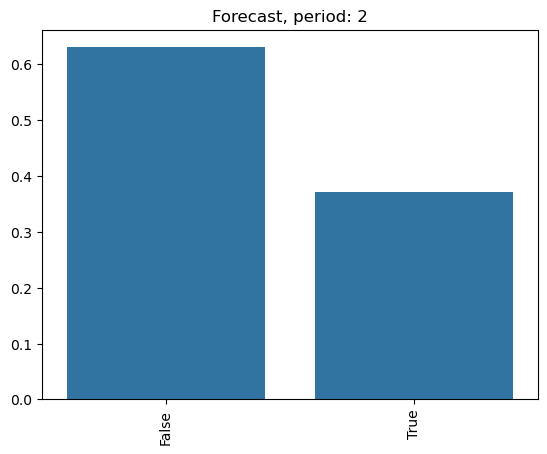

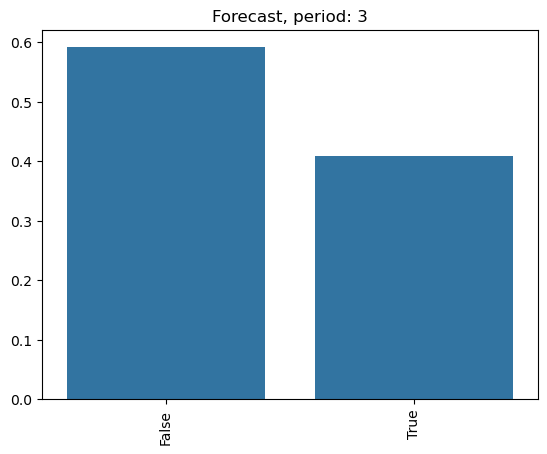

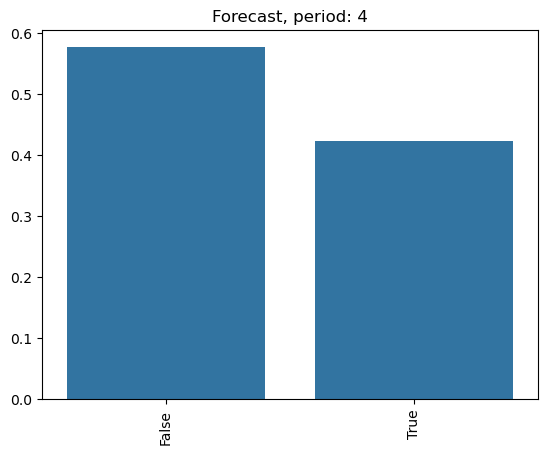

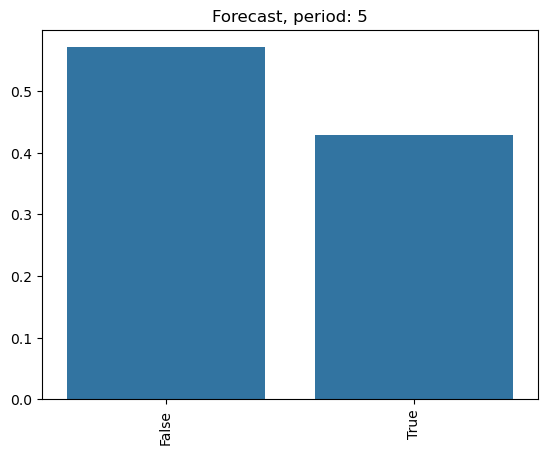

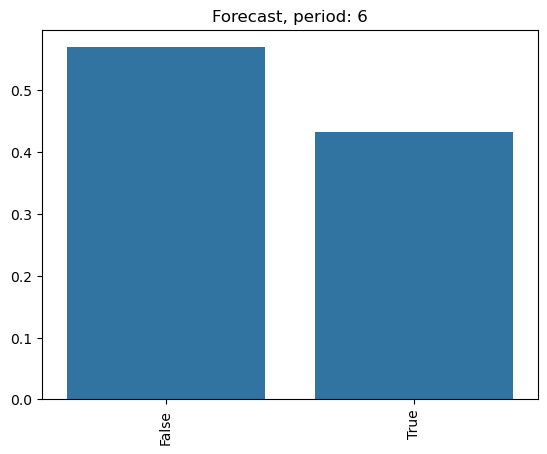

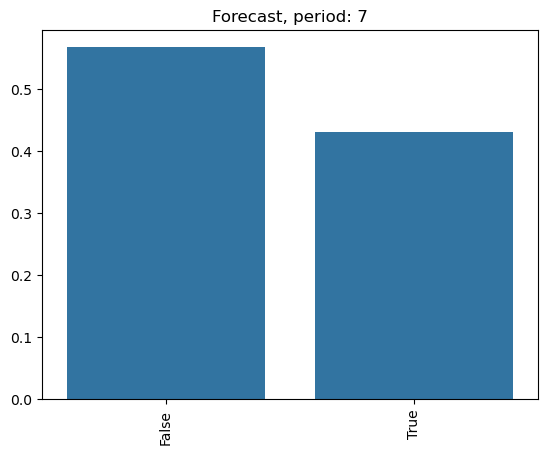

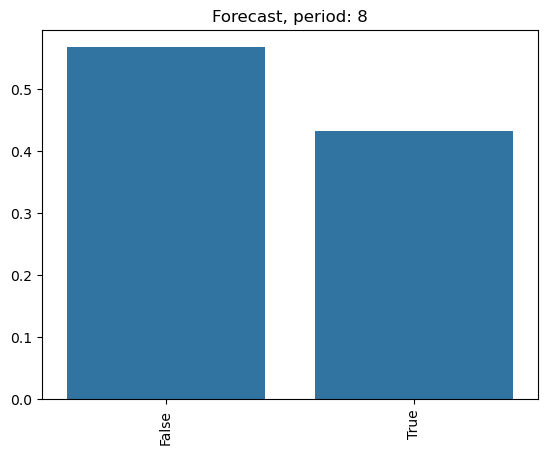

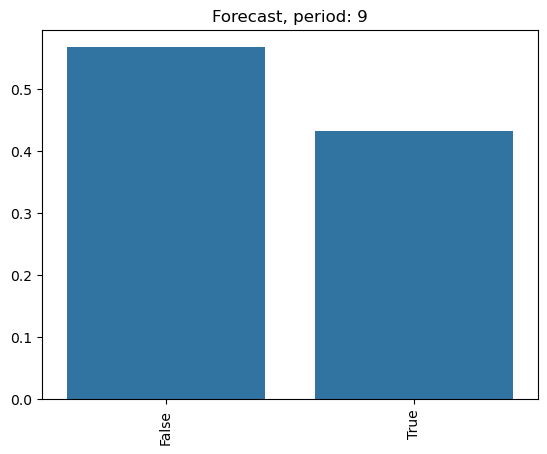

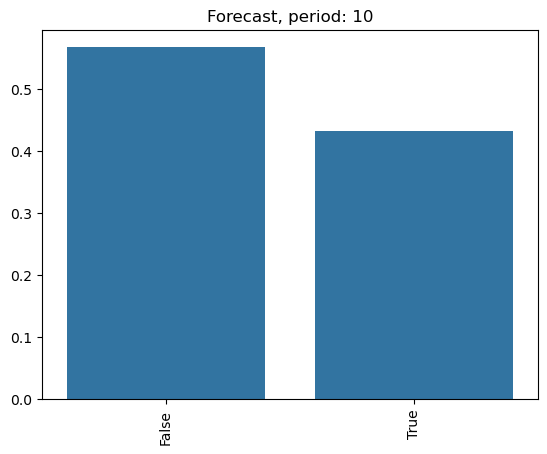

In [48]:
np.random.seed(100)

initial_state = np.random.choice(states) # Choose an initial state at random
state_index = states.index(initial_state) # Get the index of the initial state

##Initial density:
density = np.zeros(len(states))
density[state_index] = 1

sns.barplot(x=states,y=density).set(title=f'Forecast: 0')
plt.xticks(rotation=90)
plt.show()

n_sim = 10

forecast = [initial_state]
for t in range(n_sim): 
    density = tr_pr @ density
    forecast.append(density) # Append new forecast
    sns.barplot(x=states,y=density).set(title=f'Forecast, period: {str(t+1)}')
    plt.xticks(rotation=90)
    plt.show()


5. After about 5-7 days, the forecast becoems steady and this is true for when it is rainy and clear. This is because we only have so much data, and after a while, the predictions just become the average.

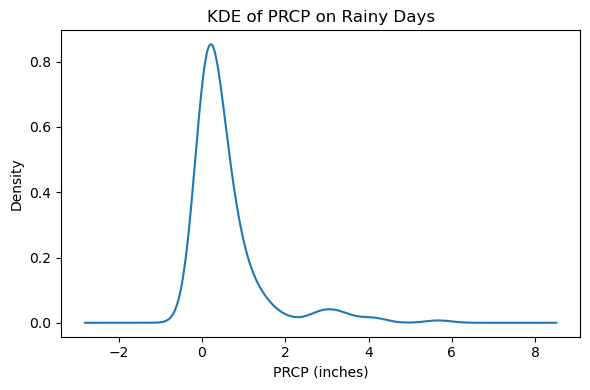

In [49]:
prcp_rainy = data.loc[data["rain"]==1, "PRCP"].dropna()

ax = prcp_rainy.plot(kind="kde", figsize=(6,4))
ax.set_xlabel("PRCP (inches)")
ax.set_title("KDE of PRCP on Rainy Days")
plt.tight_layout()
plt.show()

7. It is always smart to get more data! To make this model better, I would include data from past years to get a good understanding about how weather transitions work depending on the seasons.

4. Taxicab trajectories: Using the pickled taxicab data, we want to complete the exercise from class.

- For the taxicab trajectory data, determine your state space and clean your sequences of cab rides.
- Compute the transition matrix for the taxicab data between neighborhoods in Manhattan. Plot it in a heat map. What are the most common routes?
- Explain why taxicabs are most likely order 1, and not 2 or more.
- Starting at Hell's Kitchen, create a sequence of forecasts of where the cab is likely to be in 2, 3, 5, and 10 trips
- Starting at any neighborhood, iterate your forecast until it is no longer changing very much. Where do cabs spend most of their time working in Manhattan?

In [18]:
with open('taxicab.pkl', 'rb') as f:
    data = pickle.load(f)

print(len(data))

1000


In [19]:
#extract state space
states = set(data[0])
for i in range(1, len(data)):
    trip_i = set(data[i])
    states = states.union(trip_i)
states = list(states)


In [20]:
# compute transition counts

S = len(states)
tr_counts = np.zeros( (S, S) )

## Compute transition counts:
for trip in data:
    seq = np.array(trip)
    for t in range(1,len(seq)):
        # Current and next tokens:
        x_tm1 = seq[t-1] # previous state
        x_t = seq[t] # current state
        # Determine transition indices:
        index_from = states.index(x_tm1)
        index_to = states.index(x_t)
        # Update transition counts:
        tr_counts[index_to, index_from] += 1

print('Transition Counts:\n', tr_counts)

Transition Counts:
 [[6.00930e+04 8.50000e+03 2.76000e+02 ... 1.64200e+04 5.61300e+03
  1.25610e+04]
 [1.21990e+04 1.38632e+05 5.50000e+02 ... 4.35300e+04 9.56200e+03
  4.09130e+04]
 [2.52000e+02 6.18000e+02 3.23970e+04 ... 4.20400e+03 2.56900e+03
  1.34500e+03]
 ...
 [1.62140e+04 4.69930e+04 4.25800e+03 ... 6.62397e+05 7.42960e+04
  1.23919e+05]
 [5.25200e+03 1.07980e+04 2.63500e+03 ... 7.26710e+04 1.86463e+05
  1.77440e+04]
 [1.38660e+04 4.84610e+04 1.35400e+03 ... 1.22544e+05 1.71910e+04
  2.42469e+05]]


In [24]:
sums = tr_counts.sum(axis=0, keepdims=True)
print('State proportions: \n')
print(sums)

State proportions: 

[[2.292350e+05 5.505930e+05 1.627100e+05 6.544000e+05 1.063810e+05
  3.603000e+03 1.431100e+04 1.224335e+06 3.851989e+06 2.171460e+05
  7.252200e+04 8.886410e+05 3.859100e+04 3.168450e+05 1.058700e+05
  1.000000e+00 1.200000e+01 5.017520e+05 3.000000e+00 4.086350e+05
  4.415730e+05 1.743200e+05 5.077810e+05 5.791000e+04 2.363902e+06
  1.038800e+04 1.803502e+06 3.705730e+05 1.112820e+05 5.102590e+05
  3.952900e+05 8.010000e+03 2.797710e+06 3.701250e+05 4.930000e+02
  1.978286e+06 8.740570e+05 8.393600e+05]]


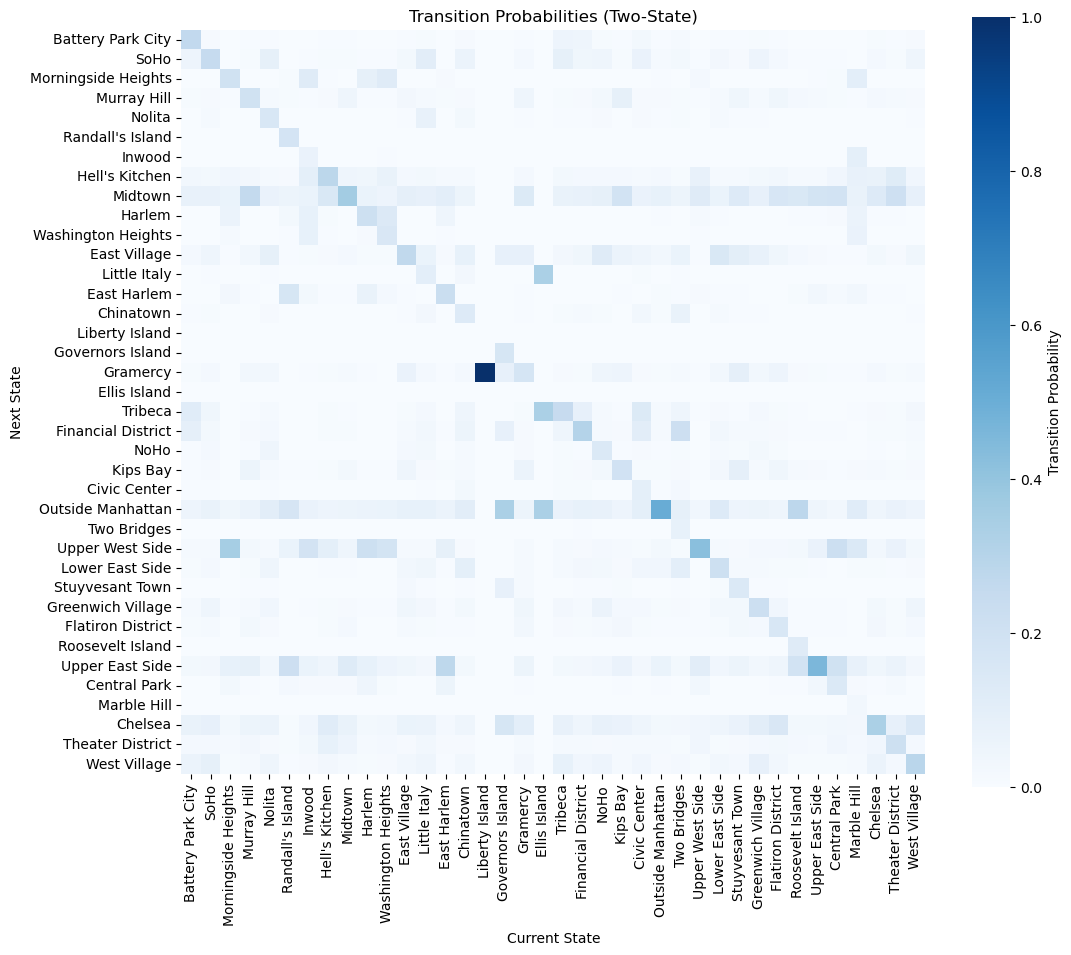

In [30]:
tr_pr = np.divide(tr_counts, sums, out=np.zeros_like(tr_counts), where=sums!=0)
tr_df = pd.DataFrame(np.round(tr_pr,2), index=states, columns=states)

plt.figure(figsize=(12, 10))
sns.heatmap(tr_pr, 
            cmap='Blues',
            square=True,
            annot=False,
            xticklabels=states,
            yticklabels=states,
            cbar_kws={'label': 'Transition Probability'})
plt.title('Transition Probabilities (Two-State)')
plt.xlabel('Current State')
plt.ylabel('Next State')
plt.show()

The most common routes are within a neighborhood itself like from Upper East Side to Upper East Side. Also, Gramercy to Liberty Island is a very common route.

Taxicabs are order 1 because the next neighborhood depends only on the past neighborhood. In other words, it doesn't matter where the taxicab came from to pick someone up; it only matters where they are going next.

In [35]:
state_to_idx = {s:i for i,s in enumerate(states)}
start = "Hell's Kitchen"

p0 = np.zeros((S,1))
p0[state_to_idx.get(start, 0), 0] = 1.0 

for n in [2,3,5,10]:
    pn = np.linalg.matrix_power(T, n) @ p0
    top = np.argsort(pn[:,0])[::-1][:5] # shows top 5?
    print(f"\nTop neighborhoods after {n} trips from {start}:")
    for i in top:
        print(f"  {states[i]}: {pn[i,0]:.4f}")



Top neighborhoods after 2 trips from Hell's Kitchen:
  Midtown: 0.1725
  Hell's Kitchen: 0.1192
  Chelsea: 0.1087
  Upper West Side: 0.0989
  Upper East Side: 0.0869

Top neighborhoods after 3 trips from Hell's Kitchen:
  Midtown: 0.1726
  Upper East Side: 0.1080
  Chelsea: 0.0972
  Upper West Side: 0.0916
  Outside Manhattan: 0.0900

Top neighborhoods after 5 trips from Hell's Kitchen:
  Midtown: 0.1693
  Upper East Side: 0.1204
  Outside Manhattan: 0.0994
  Chelsea: 0.0881
  Upper West Side: 0.0826

Top neighborhoods after 10 trips from Hell's Kitchen:
  Midtown: 0.1678
  Upper East Side: 0.1220
  Outside Manhattan: 0.1028
  Chelsea: 0.0861
  Upper West Side: 0.0787


In [ ]:
p = np.ones((S,1))/S
for _ in range(1000):
    p_next = T @ p
    if np.allclose(p_next, p, atol=1e-10): # allclose checks to see if the matrices are the same at every row/column entry
        break
    p = p_next

top_ss = np.argsort(p[:,0])[::-1][:10]
print("\nApproximate steady-state:")
for i in top_ss:
    print(f"  {states[i]}: {p[i,0]:.4f}")



Approximate steady-state (top 10):
  Midtown: 0.1677
  Upper East Side: 0.1218
  Outside Manhattan: 0.1030
  Chelsea: 0.0862
  Upper West Side: 0.0785
  Hell's Kitchen: 0.0533
  East Village: 0.0387
  Theater District: 0.0381
  West Village: 0.0366
  Murray Hill: 0.0285

Mode of steady state: Midtown


Since, Midtown has the highest approximate steady state probability, most taxicabs are hanging out in Midtown. This makes complete sense because Midtown is the most popular neighborhood in New York City.